# Personality Assessment Project
Data set : https://www.kaggle.com/tunguz/big-five-personality-test/code?datasetId=516764

In [2]:
import pandas as pd
import numpy as np

raw_dataset = pd.read_csv("D:\GeneralDocs\WWC_Mentorship_program\data-final.csv\data-final.csv",delimiter='\t')
raw_dataset

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [4]:
df = raw_dataset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [5]:
df.isnull().sum()

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
                         ... 
endelapse                   0
IPC                         0
country                    77
lat_appx_lots_of_err        0
long_appx_lots_of_err       0
Length: 110, dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

EXT1                     0
EXT2                     0
EXT3                     0
EXT4                     0
EXT5                     0
                        ..
endelapse                0
IPC                      0
country                  0
lat_appx_lots_of_err     0
long_appx_lots_of_err    0
Length: 110, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012050 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 857.1+ MB


In [8]:
df.sample(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
611447,4.0,5.0,3.0,4.0,2.0,3.0,2.0,4.0,3.0,5.0,...,2018-02-14 12:59:04,1280.0,800.0,3.0,214.0,12,14,US,39.7379,-104.985
788778,1.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,5.0,...,2018-06-19 05:44:56,1366.0,768.0,44.0,148.0,120,1,PH,14.5833,120.9667
377283,1.0,5.0,2.0,5.0,2.0,4.0,1.0,5.0,1.0,4.0,...,2017-03-16 17:57:46,1280.0,800.0,59.0,161.0,12,1,US,38.4221,-77.4083
290331,2.0,3.0,2.0,3.0,3.0,2.0,1.0,4.0,2.0,4.0,...,2016-12-11 19:27:56,1600.0,900.0,34.0,139.0,7,1,US,42.2793,-71.245
478035,3.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,3.0,4.0,...,2017-08-29 13:12:18,1440.0,900.0,6.0,194.0,13,1,AU,-12.4634,130.8346


### Exploratory Analysis

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['figure.facecolor']='#fff'

### Responses

In [9]:
df.columns


Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

#### EXT : Extroversion 
Extraversion (or extroversion) is characterized by excitability, sociability, talkativeness, assertiveness, and high amounts of emotional expressiveness. People who are high in extraversion are outgoing and tend to gain energy in social situations. Being around other people helps them feel energized and excited.

People who are low in extraversion (or introverted) tend to be more reserved and have less energy to expend in social settings. Social events can feel draining and introverts often require a period of solitude and quiet in order to "recharge."

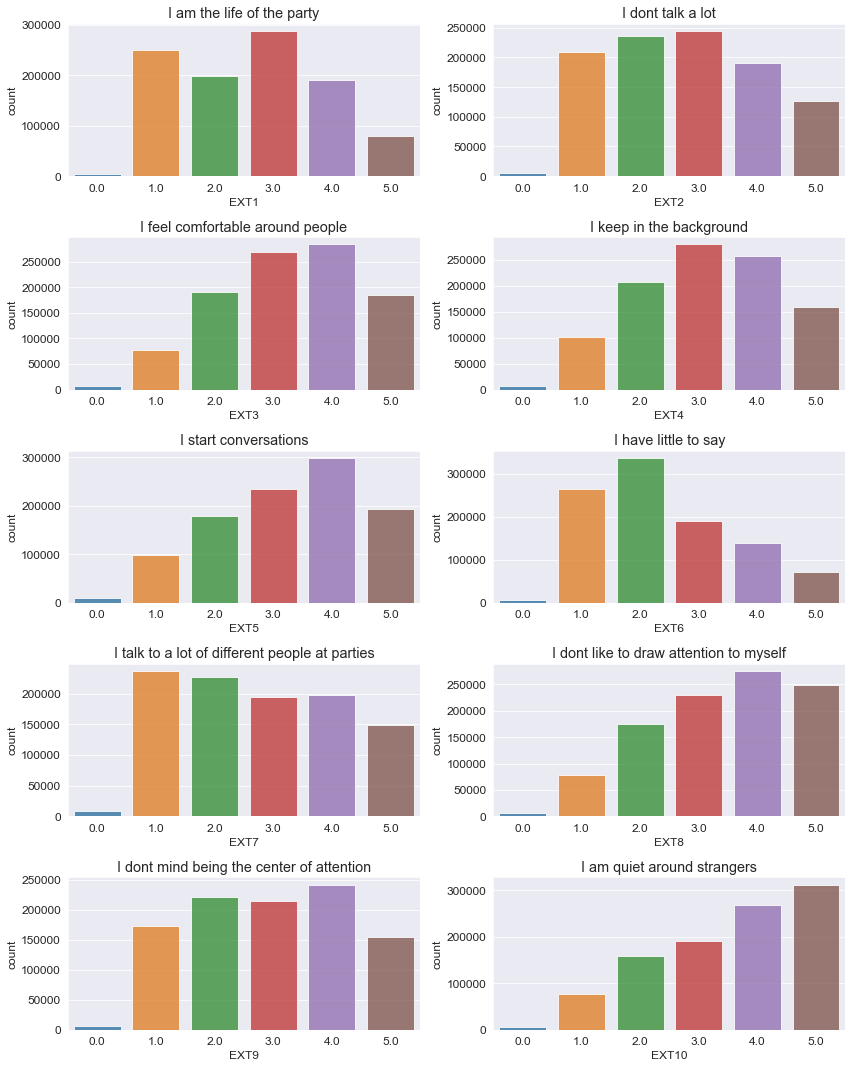

In [10]:
plt.figure(figsize=[12,15])
columns=['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']
question=['I am the life of the party',
          'I dont talk a lot',
          'I feel comfortable around people',
          'I keep in the background',
          'I start conversations',
          'I have little to say',
          'I talk to a lot of different people at parties',
          'I dont like to draw attention to myself',
          'I dont mind being the center of attention',
          'I am quiet around strangers']
n=1
for f in columns:
    plt.subplot(5,2,n)
    sns.countplot(x=f, alpha=0.8, data=df)
    plt.title(question[n-1]) 
    n=n+1
plt.tight_layout()
plt.show()

In [11]:
ext_df = df[columns].copy()
ext_df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
count,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06
mean,2.647892e+00,2.773242e+00,3.288202e+00,3.140699e+00,3.276805e+00,2.401119e+00,2.771527e+00,3.414799e+00,2.963761e+00,3.556569e+00
std,1.264476e+00,1.323982e+00,1.215083e+00,1.237473e+00,1.277636e+00,1.225812e+00,1.400348e+00,1.271954e+00,1.346053e+00,1.305249e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


#### EST : Neuroticism
Neuroticism is a trait characterized by sadness, moodiness, and emotional instability. Individuals who are high in this trait tend to experience mood swings, anxiety, irritability, and sadness. Those low in this trait tend to be more stable and emotionally resilient.

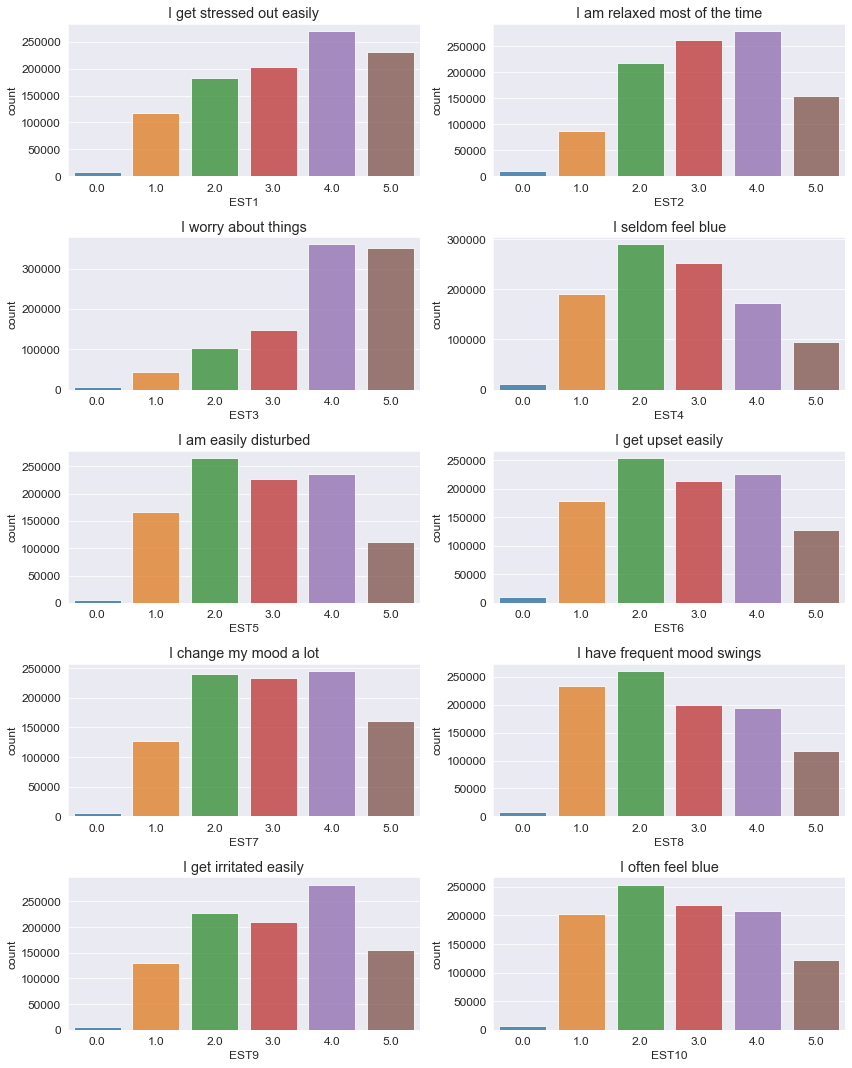

In [37]:
plt.figure(figsize=[12,15])
columns=['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']
question=['I get stressed out easily',
          'I am relaxed most of the time',
          'I worry about things',
          'I seldom feel blue',
          'I am easily disturbed',
          'I get upset easily',
          'I change my mood a lot',
          'I have frequent mood swings',
          'I get irritated easily',
          'I often feel blue']
n=1
for f in columns:
    plt.subplot(5,2,n)
    sns.countplot(x=f, alpha=0.8, data=df)
    # sns.despine()
    plt.title(question[n-1])   
    n=n+1
plt.tight_layout()
plt.show()

In [38]:
est_df = df[columns].copy()
est_df.describe()

,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10
count,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06,1.012050e+06
mean,3.285994e+00,3.164965e+00,3.846476e+00,2.663509e+00,2.842890e+00,2.841069e+00,3.050391e+00,2.683425e+00,3.088464e+00,2.773686e+00
std,1.345608e+00,1.228296e+00,1.163425e+00,1.252982e+00,1.273899e+00,1.326569e+00,1.293036e+00,1.343042e+00,1.297149e+00,1.323210e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
50%,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
75%,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


#### AGR : Agreeableness
This personality dimension includes attributes such as trust, altruism, kindness, affection, and other prosocial behaviors.1﻿ People who are high in agreeableness tend to be more cooperative while those low in this trait tend to be more competitive and sometimes even manipulative

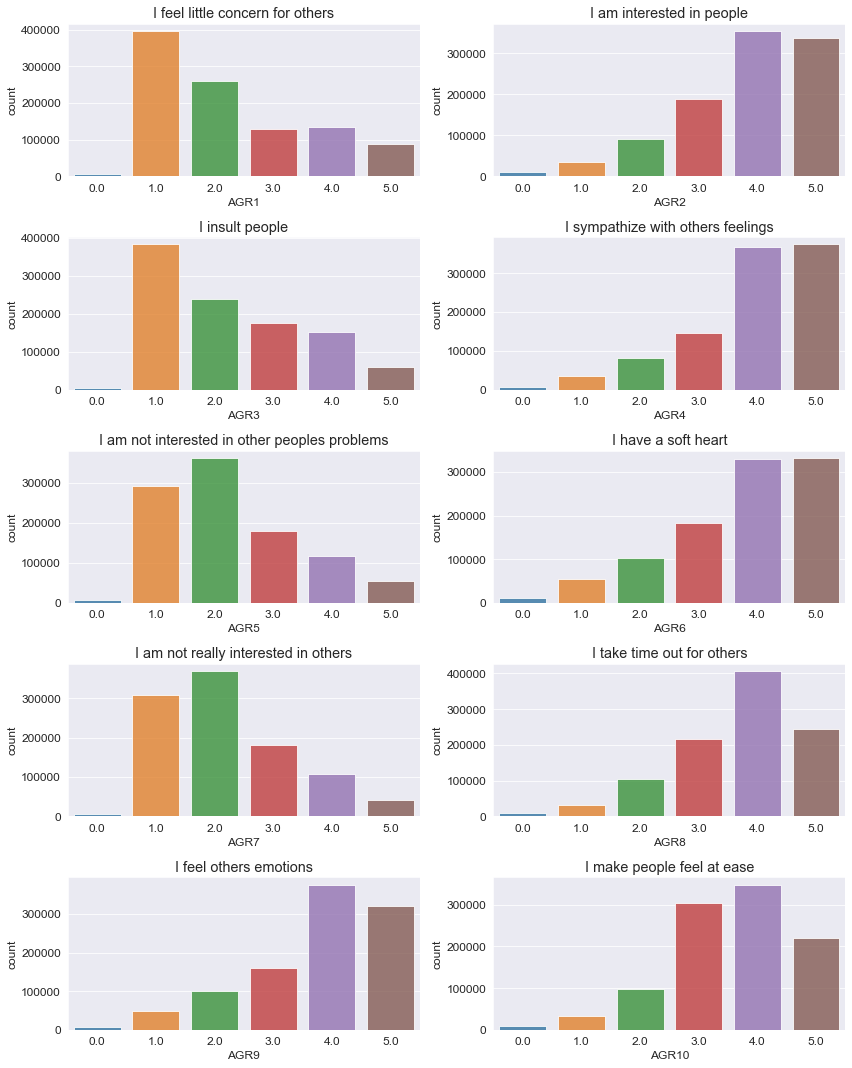

In [23]:
plt.figure(figsize=[12,15])
columns=['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']
question=['I feel little concern for others',
          'I am interested in people',
          'I insult people',
          'I sympathize with others feelings',
          'I am not interested in other peoples problems',
          'I have a soft heart',
          'I am not really interested in others',
          'I take time out for others',
          'I feel others emotions',
          'I make people feel at ease']
n=1
for f in columns:
    plt.subplot(5,2,n)
    sns.countplot(x=f, alpha=0.8, data=df)
    # sns.despine()
    plt.title(question[n-1])
    n=n+1
plt.tight_layout()
plt.show()

#### CSN : Conscientiousness
Standard features of this dimension include high levels of thoughtfulness, good impulse control, and goal-directed behaviors.1﻿ Highly conscientious people tend to be organized and mindful of details. They plan ahead, think about how their behavior affects others, and are mindful of deadlines.

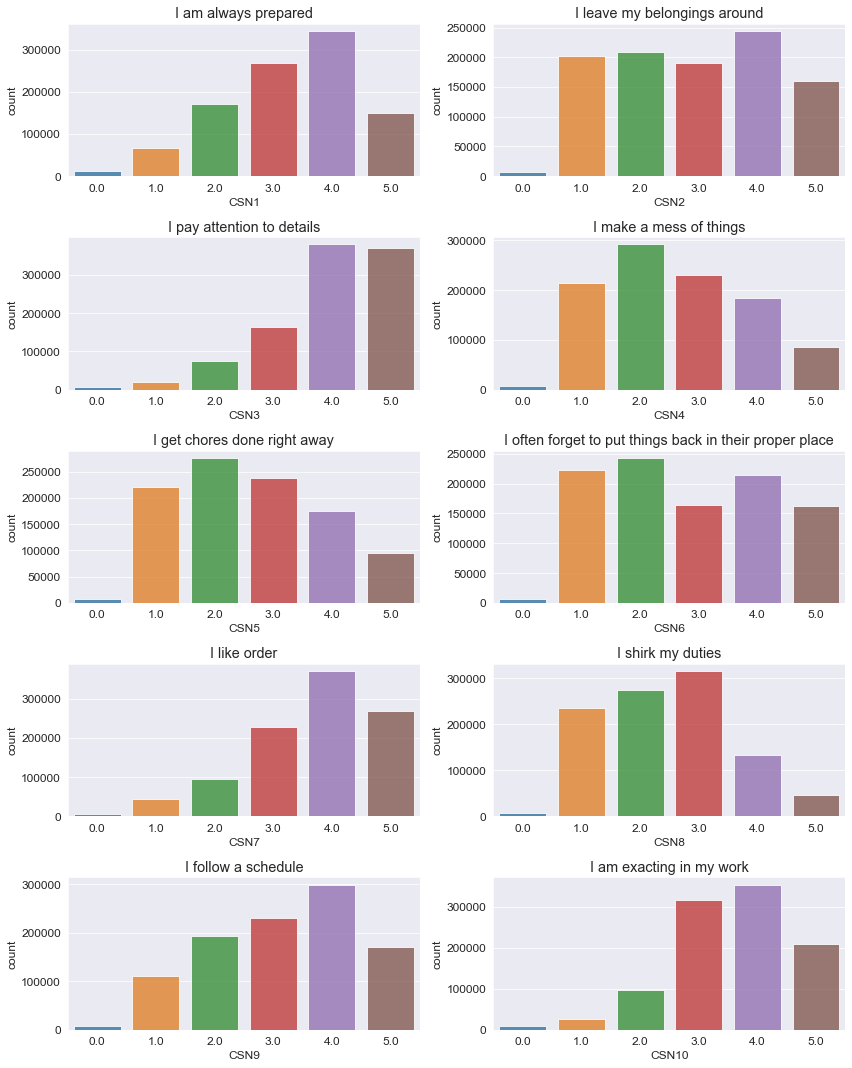

In [25]:
plt.figure(figsize=[12,15])
columns=['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']
question=['I am always prepared',
          'I leave my belongings around',
          'I pay attention to details',
          'I make a mess of things',
          'I get chores done right away',
          'I often forget to put things back in their proper place',
          'I like order',
          'I shirk my duties',
          'I follow a schedule',
          'I am exacting in my work']
n=1
for f in columns:
    plt.subplot(5,2,n)
    sns.countplot(x=f, alpha=0.8, data=df)
    # sns.despine()
    plt.title(question[n-1])
    n=n+1
plt.tight_layout()
plt.show()

#### OPN : Openness
This trait features characteristics such as imagination and insight.1﻿ People who are high in this trait also tend to have a broad range of interests. They are curious about the world and other people and eager to learn new things and enjoy new experiences.

People who are high in this trait tend to be more adventurous and creative. People low in this trait are often much more traditional and may struggle with abstract thinking.

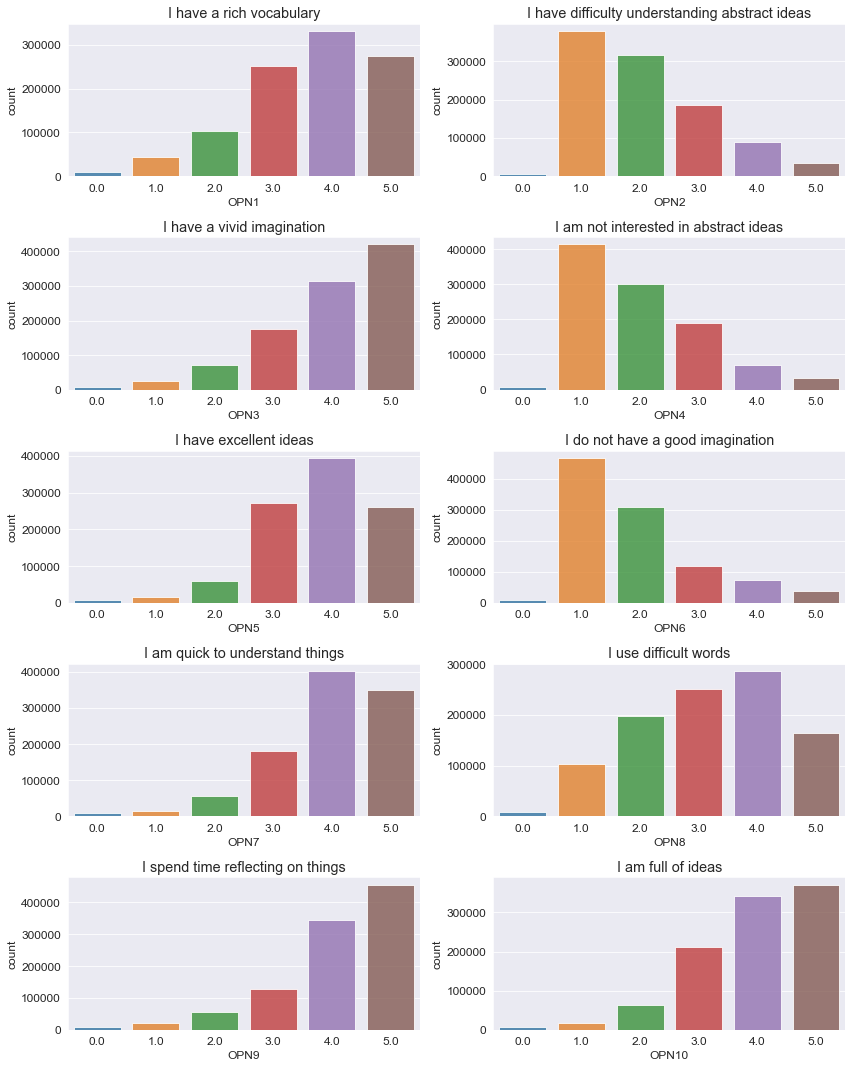

In [26]:
plt.figure(figsize=[12,15])
columns=['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']
question=['I have a rich vocabulary',
          'I have difficulty understanding abstract ideas',
          'I have a vivid imagination',
          'I am not interested in abstract ideas',
          'I have excellent ideas',
          'I do not have a good imagination',
          'I am quick to understand things',
          'I use difficult words',
          'I spend time reflecting on things',
          'I am full of ideas']
n=1
for f in columns:
    plt.subplot(5,2,n)
    sns.countplot(x=f, alpha=0.8, data=df)
    plt.title(question[n-1])
    n=n+1
plt.tight_layout()
plt.show()

### Trends in question responses

Text(0.5, 1.0, 'Average score for Questions')

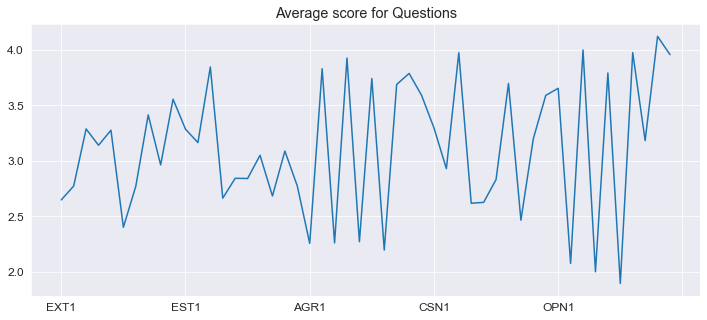

In [61]:
plt.figure(figsize=[12,5])
df[df.columns[0:50]].mean().plot()
plt.title("Average score for Questions")

### Analysing the time taken to answer each question

Text(0.5, 1.0, 'Average time taken to answer Each question')

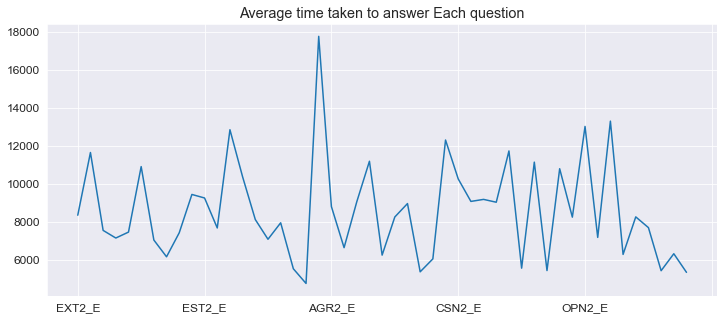

In [60]:
plt.figure(figsize=[12,5])
df[df.columns[51:100]].mean().plot()
plt.title("Average time taken to answer Each question")

### Finding relation between personality and type of device used

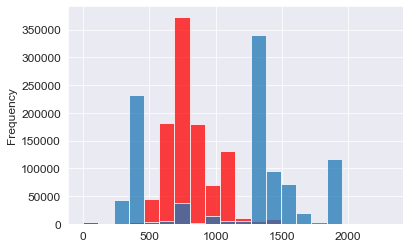

In [73]:
df[df.columns[102]].plot.hist(range=(0,2300),bins=20,color='r',alpha=0.75) #width
df[df.columns[101]].plot.hist(range=(0,2300),bins=20, alpha=0.75) #height
plt.show()

### Trends among user records and location

In [10]:
country_dist = df.groupby('country').agg('count').sort_values(by=['EXT1'], ascending=False)

In [ ]:
plt.figure(figsize=[5,5])
mylabels=list(country_dist.index)
plt.pie(country_dist[country_dist.columns[0]], labels=mylabels,autopct='%1.1f%%')
plt.show()

Majority respondents on the survey are from USA

### Analysing the distribution of records between unique and shared IP addresses
IPC : The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions

MemoryError: Unable to allocate 10.6 MiB for an array with shape (694886, 2) and data type float64

<Figure size 1080x360 with 0 Axes>

MemoryError: Unable to allocate 10.6 MiB for an array with shape (2, 694886) and data type float64

<Figure size 432x288 with 1 Axes>